# **Types of tennis players - clustering project**


## Origins of the project

Back in 2014, listening to the radio, each day would bring joy upon my face as the news were confirming successive victories for the romanian female tennis player Simona Halep.

Yet hardly in the spotlight at the time, I remember when the news came through that she won the Quatar Open, at Doha. 

The magnitude of her success in the past couple of years is greatly attributed to the genius of her coach, Darren Cahill.

Useful links: 
https://www.youtube.com/watch?v=fTxlVppvKug

https://www.youtube.com/watch?v=gMSmtj_uA8o

As an amateur tennis player myself, I find it rather fascinating that a coach can see through the opponent's style of play and tell the mentee what to focus on in order to get back in the game, should a difficult moment arise.

Through the means of this project I intend to find out if tennis players can be distinguished in several categories, and what style of play should one adopt against each.

Join me on this journey!


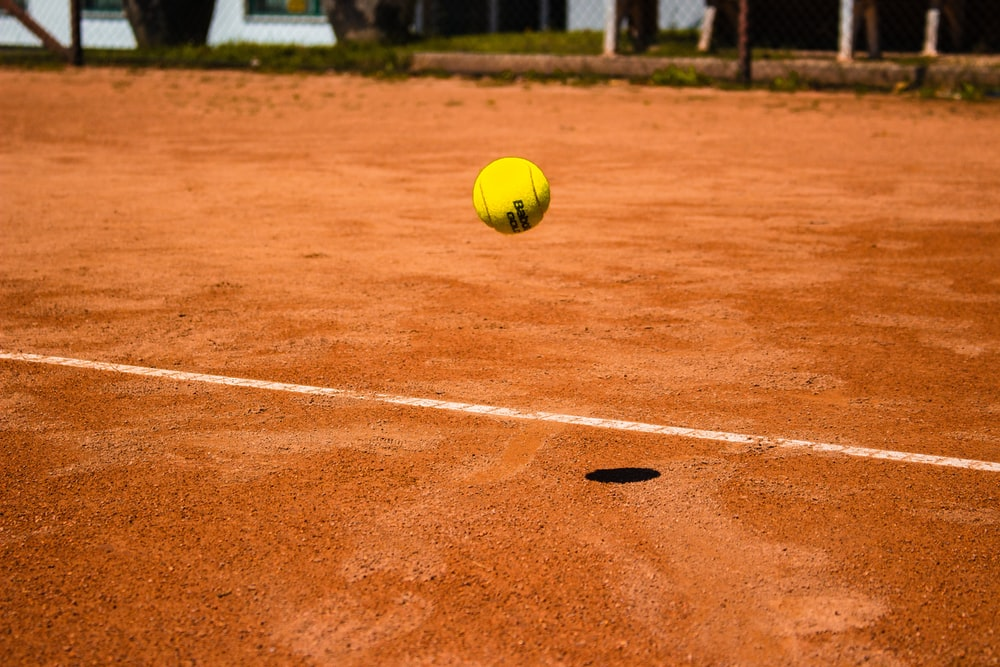

## General Findings 




Using both "The elbow method" and "The Dendrogram Approach", we were able to determine that tennis players can roughly be categorized in 4 different clusters:

1) The serve-and-volley schemer

-traits: NPA++  FSW++  FSP--

-style of play: the players in this group adopt a very aggressive tactic, coming to the net at every opportunity and trying to close the point as soon as possible.

-representatives: tall players in general, as their height prevents them from excelling in rallies. ( John Istner, Jack Sock, Nick Kyrgios and the one and only Roger Federer )

2) Behind the baseline defender

-traits: WNR++  UFE++  NPA--

-style of play: probably the most common type of players, they prefer staying in the rally for as long as possible, tiring the opponent in the long run and forcing the error in the respective point

-representatives: Simona Halep, Diego Schwartzman, Rafael Nadal

3) The Counter-Puncher

-traits: UFE--  NPA--

-style of play: adjusting his/her tennis according to the opponent; patiently returning the ball in the opposite court until the player on the other side makes a mistake

-representatives: Alex Zverev, Dominic Thiem

4) The Well-rounded player

-traits: WNR--

-style of play: does not excel in any particular area, and will not the opponent recognize any weak points at first glance. Only downside of this style of play is lack of risks taken.

-representatives: Novak Djokovic, Daniil Medvedev, Angelique Kerber

In [ ]:
# Let's start by importing some useful libraries in the beginning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Useful abbreviations:

'''
Result Result of the match (0/1) 

FSP = First Serve Percentage for player  (Real Number)

FSW = First Serve Won by player  (Real Number)

SSP = Second Serve Percentage for player  (Real Number)

SSW = Second Serve Won by player (Real Number)

ACE = Aces won by player  (Numeric-Integer)

DBF = Double Faults committed by player  (Numeric-Integer)

WNR = Winners earned by player  (Numeric)

UFE = Unforced Errors committed by player  (Numeric)

BPC = Break Points Created by player  (Numeric)

BPW = Break Points Won by player  (Numeric)

NPA = Net Points Attempted by player  (Numeric)

NPW = Net Points Won by player  (Numeric)
'''

'\nResult Result of the match (0/1) \n\nFSP = First Serve Percentage for player  (Real Number)\n\nFSW = First Serve Won by player  (Real Number)\n\nSSP = Second Serve Percentage for player  (Real Number)\n\nSSW = Second Serve Won by player (Real Number)\n\nACE = Aces won by player  (Numeric-Integer)\n\nDBF = Double Faults committed by player  (Numeric-Integer)\n\nWNR = Winners earned by player  (Numeric)\n\nUFE = Unforced Errors committed by player  (Numeric)\n\nBPC = Break Points Created by player  (Numeric)\n\nBPW = Break Points Won by player  (Numeric)\n\nNPA = Net Points Attempted by player  (Numeric)\n\nNPW = Net Points Won by player  (Numeric)\n'

## Data collected from UCI machine learning repository

https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics

In [ ]:
df=pd.read_csv('FrenchOpen-men-2013.csv')
dw=pd.read_csv('FrenchOpen-women-2013.csv')

## Data Preprocessing

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Round,125.0,1.952000,1.281733,1.0,1.00,1.0,2.00,7.0
Result,125.0,0.472000,0.501224,0.0,0.00,0.0,1.00,1.0
FNL.1,125.0,1.728000,1.316006,0.0,0.00,2.0,3.00,3.0
FNL.2,125.0,1.840000,1.272539,0.0,1.00,2.0,3.00,3.0
FSP.1,125.0,63.600000,8.036208,43.0,58.00,64.0,69.00,84.0
FSW.1,125.0,48.624000,18.030737,10.0,35.00,45.0,61.00,99.0
SSP.1,125.0,36.400000,8.036208,16.0,31.00,36.0,42.00,57.0
SSW.1,125.0,20.040000,8.777170,6.0,13.00,20.0,25.00,52.0
ACE.1,125.0,6.152000,4.802647,0.0,3.00,5.0,8.00,24.0
DBF.1,123.0,2.991870,2.348686,0.0,1.00,3.0,4.00,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player1  125 non-null    object 
 1   Player2  125 non-null    object 
 2   Round    125 non-null    int64  
 3   Result   125 non-null    int64  
 4   FNL.1    125 non-null    int64  
 5   FNL.2    125 non-null    int64  
 6   FSP.1    125 non-null    int64  
 7   FSW.1    125 non-null    int64  
 8   SSP.1    125 non-null    int64  
 9   SSW.1    125 non-null    int64  
 10  ACE.1    125 non-null    int64  
 11  DBF.1    123 non-null    float64
 12  WNR.1    125 non-null    int64  
 13  UFE.1    125 non-null    int64  
 14  BPC.1    125 non-null    int64  
 15  BPW.1    125 non-null    int64  
 16  NPA.1    125 non-null    int64  
 17  NPW.1    125 non-null    int64  
 18  TPW.1    125 non-null    int64  
 19  ST1.1    125 non-null    int64  
 20  ST2.1    125 non-null    int64  
 21  ST3.1    123 non

In [ ]:
df.head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,1,3.0,12,29,1,3,9,20,50,2,2,3.0,NaN,NaN,68,33,32,14,10,0.0,33,19,7,7,14,18,88,6,6,6.0,NaN,NaN
1,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,7,3.0,26,20,5,8,12,21,120,6,6,7.0,NaN,NaN,52,35,48,24,0,2.0,40,47,1,16,22,25,106,3,3,5.0,NaN,NaN
2,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,4,6.0,42,55,10,22,14,32,140,6,6,3.0,0.0,6.0,46,42,54,31,6,8.0,39,54,10,18,19,27,139,3,3,6.0,6.0,3.0
3,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,14,2.0,48,27,4,13,14,30,163,7,6,5.0,7.0,NaN,53,58,47,38,13,10.0,72,56,4,13,33,43,149,6,3,7.0,6.0,NaN
4,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,4,4.0,21,24,1,1,3,5,72,3,4,4.0,NaN,NaN,58,39,42,19,10,1.0,42,37,4,7,12,13,93,6,6,6.0,NaN,NaN


In [ ]:
dw.head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,0,2,62,18,38,5,0.0,3.0,8,8,0,0,1,3,31,2,1.0,NaN,NaN,NaN,68,25,32,8,4.0,0.0,25,19,4,6,3,5,57,6,6.0,NaN,NaN,NaN
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,2,0,57,23,43,17,3.0,1.0,37,21,4,10,16,20,71,6,7.0,NaN,NaN,NaN,66,28,34,6,1.0,2.0,13,21,1,3,4,8,48,1,6.0,NaN,NaN,NaN
2,Jie Zheng,Vesna Dolonc,1,1,2,0,76,30,24,5,1.0,0.0,25,13,4,12,4,5,70,6,6.0,NaN,NaN,NaN,76,35,24,6,0.0,3.0,20,25,0,4,14,20,56,4,1.0,NaN,NaN,NaN
3,Tamira Paszek,Melanie Oudin,1,0,0,2,59,16,41,8,2.0,6.0,21,38,6,15,2,4,66,4,3.0,NaN,NaN,NaN,63,27,37,9,0.0,3.0,24,29,8,13,5,8,78,6,6.0,NaN,NaN,NaN
4,Karin Knapp,Sloane Stephens,1,0,0,2,57,18,43,13,NaN,3.0,15,27,2,2,3,5,50,2,5.0,NaN,NaN,NaN,65,22,35,10,NaN,2.0,9,16,5,7,1,4,61,6,7.0,NaN,NaN,NaN


Thw idea is to use both the left and the right half of each of the two datasets ( df and dw ) as this way we can double the number of observations, simply by taking into consideration the opponent of "Player 1"

In [ ]:
df1=df[['FSP.1',	'FSW.1',	'SSP.1',	'SSW.1',	'ACE.1',	'DBF.1',	'WNR.1', 'UFE.1', 'BPC.1',	'BPW.1', 'NPA.1',	'NPW.1']]

In [ ]:
df2=df[['FSP.2', 'FSW.2',	'SSP.2',	'SSW.2',	'ACE.2',	'DBF.2',	'WNR.2',	'UFE.2',	'BPC.2',	'BPW.2',	'NPA.2',	'NPW.2']]

In [ ]:
dw1=dw[['FSP.1',	'FSW.1',	'SSP.1',	'SSW.1',	'ACE.1',	'DBF.1',	'WNR.1', 'UFE.1', 'BPC.1',	'BPW.1', 'NPA.1',	'NPW.1']]

In [ ]:
dw2=dw[['FSP.2', 'FSW.2',	'SSP.2',	'SSW.2',	'ACE.2',	'DBF.2',	'WNR.2',	'UFE.2',	'BPC.2',	'BPW.2',	'NPA.2',	'NPW.2']]

In [ ]:
# for "Player 2" we want to swich the result columns in their corresponding dataset

def returner(x):
  if x==0:
    return 1
  else:
    return 0

In [ ]:
df1['result']=df.iloc[:,3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['result']=df['Result'].apply(lambda x: returner(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dw1['result']=dw.iloc[:,3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dw2['result']=dw['Result'].apply(lambda x: returner(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# dw1

In [ ]:
# df1

We set universal names for the new columns, instead of them being particular to the player, such as ACE.1 or WNR.2

In [ ]:
df1.set_axis(['FSP', 'FSW',	'SSP',	'SSW',	'ACE',	'DBF',	'WNR',	'UFE',	'BPC',	'BPW',	'NPA',	'NPW','result'],
             axis=1,inplace=True)

In [ ]:
dw2.set_axis(['FSP', 'FSW',	'SSP',	'SSW',	'ACE',	'DBF',	'WNR',	'UFE',	'BPC',	'BPW',	'NPA',	'NPW','result'],
             axis=1,inplace=True)

In [ ]:
dw1.set_axis(['FSP', 'FSW',	'SSP',	'SSW',	'ACE',	'DBF',	'WNR',	'UFE',	'BPC',	'BPW',	'NPA',	'NPW','result'],
             axis=1,inplace=True)

In [ ]:
df2.set_axis(['FSP', 'FSW',	'SSP',	'SSW',	'ACE',	'DBF',	'WNR',	'UFE',	'BPC',	'BPW',	'NPA',	'NPW','result'],
             axis=1,inplace=True)

In [ ]:
# la df1 nu e nevoie sa schimbam indicii

We also need to adjust indices so that we can concatenate the dataframes later

In [ ]:
df2.set_axis([x for x in range(125,250)],axis=0,inplace=True)

In [ ]:
dw1.set_axis([x for x in range(250,377)],axis=0,inplace=True)

In [ ]:
dw2.set_axis([x for x in range(377,504)],axis=0,inplace=True)

In [ ]:
# dw2

In [ ]:
dww=pd.concat([dw1,dw2],sort=False)
# dww

In [ ]:
dff=pd.concat([df1,df2],sort=False)
# dff

In [ ]:
dataset=pd.concat([dff,dww],sort=False)

Finally, we have the dataset

In [ ]:
dataset

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,result
0,62,27,38,11,1.0,3.0,12,29,1,3,9,20,0
1,62,54,38,22,7.0,3.0,26,20,5,8,12,21,1
2,62,53,38,15,4.0,6.0,42,55,10,22,14,32,1
3,72,87,28,19,14.0,2.0,48,27,4,13,14,30,1
4,52,31,48,22,4.0,4.0,21,24,1,1,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,84,41,16,3,0.0,0.0,30,25,6,7,16,24,1
500,77,28,23,7,1.0,1.0,19,24,4,9,3,6,0
501,62,41,38,10,12.0,11.0,42,39,6,10,2,6,1
502,80,10,20,1,0.0,NaN,2,3,0,0,2,2,0


## EDA

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.dtypes

FSP         int64
FSW         int64
SSP         int64
SSW         int64
ACE       float64
DBF       float64
WNR         int64
UFE         int64
BPC         int64
BPW         int64
NPA         int64
NPW         int64
result      int64
dtype: object

In [ ]:
dataset.isnull().sum()

FSP        0
FSW        0
SSP        0
SSW        0
ACE       26
DBF       10
WNR        0
UFE        0
BPC        0
BPW        0
NPA        0
NPW        0
result     0
dtype: int64

Visualizing the null values

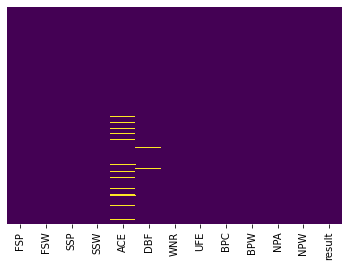

In [ ]:
sns.heatmap(dataset.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Having only two problematic columns, we'll avoid using a SimpleImputer as that would return an numpy.ndarray, and we will continue to use the dataset as a pandas.DataFrame for a short while

In [ ]:
'''
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df1=imputer.fit_transform(dataset)
'''

"\nfrom sklearn.impute import SimpleImputer\nimputer=SimpleImputer(strategy='mean')\ndf1=imputer.fit_transform(dataset)\n"

For the missing values we'll impute the mean of their respective columns 

In [ ]:
dataset['DBF']=dataset['DBF'].fillna(dataset['DBF'].mean())

In [ ]:
dataset['ACE']=dataset['ACE'].fillna(dataset['ACE'].mean())

Let's find out what feature is the most correlated to success

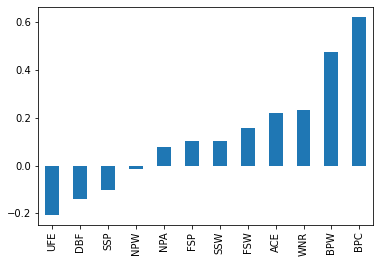

In [ ]:
dataset.corr()['result'][:-1].sort_values().plot(kind='bar')

It makes sense that creating and converting break point chances results in a victory. So does having a lower ammount of Unforced Errors.

What is more interesting is that following closely behind are number of winners and aces, which suggest that adopting a more aggressive strategy often leads to success.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


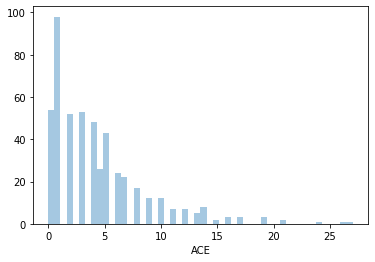

In [ ]:
sns.distplot(dataset['ACE'],bins=50,kde=False)

The distplot above shows that we dont't exactly have a normal distribution of aces.

With the majority of players managing between 1 and 10,the ace remains a game-changing weapon.

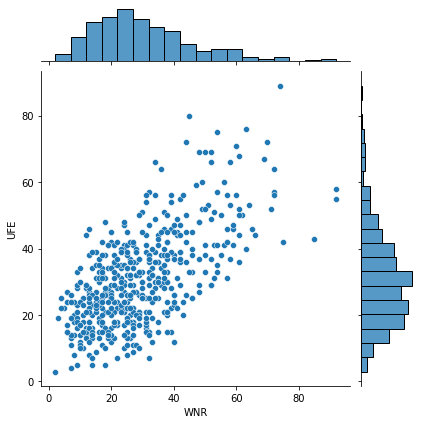

In [ ]:
sns.jointplot(x=dataset['WNR'],y=dataset['UFE'],data=dataset)

There is a linear dependence between the number of Winners and that of Unforced Errors. And it makes sense.

However, there is a lesson in this graph. It is better to take risks than wonder what it could have been.

As Theodore Roosevelt stated: "if he fails, at least fails while daring greatly, so that his place shall never be with those cold and timid souls who neither know victory nor defeat.”


## PCA

Our dataset has 12 features, making in impossible to be illustrated in its "raw" form.

In order to visualize the data in 2D we'll use Principal Component Analysis. 

PCA finds a new set of dimensions such that all the dimensions are orthogonal( and hence independent) and ranked according to the variance of data along them.

First, we must scale our values:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset.iloc[:,0:12]=scaler.fit_transform(dataset.iloc[:,0:12])

Then we apply the PCA algorithm:

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(dataset.iloc[:,0:12])

In [ ]:
dataset.iloc[:,0:12].shape

(504, 12)

In [ ]:
x_pca.shape

(504, 2)

Visualizing the two newly found components:

--> violet meaning defeat

--> yellow meaning victory

Text(0, 0.5, 'Second Principal Component')

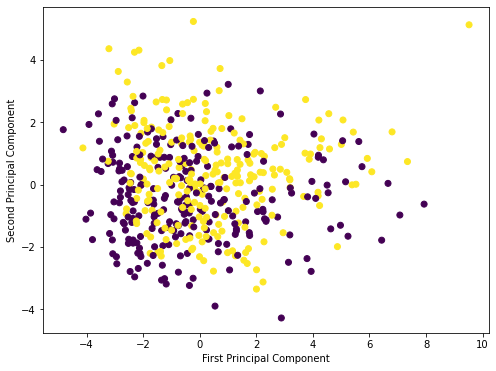

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['result'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# violet meaning defeat

"pca.components_" has the meaning of each principal component, essentially how it was derived



In [ ]:
pca.components_

# 'FSP', 'FSW',	'SSP',	'SSW',	'ACE',	'DBF',	'WNR',	'UFE',	'BPC',	'BPW',	'NPA',	'NPW'

array([[-0.08908506,  0.35870543,  0.08908506,  0.36466661,  0.28904096,
         0.16340236,  0.39939219,  0.32735648,  0.1631661 ,  0.23890282,
         0.3628752 ,  0.36080306],
       [ 0.62337267,  0.22316073, -0.62337267, -0.16719224,  0.03772465,
        -0.28365683,  0.07829548, -0.08153455,  0.11133606,  0.13028402,
         0.11535098,  0.08787018]])

We can't really make much sense of those values above, so maybe it fill help to visualize them in a more appealing way. And further below we got just the solution how:

In [ ]:
df_comp=pd.DataFrame(pca.components_,columns=dataset.iloc[:,0:12].columns)

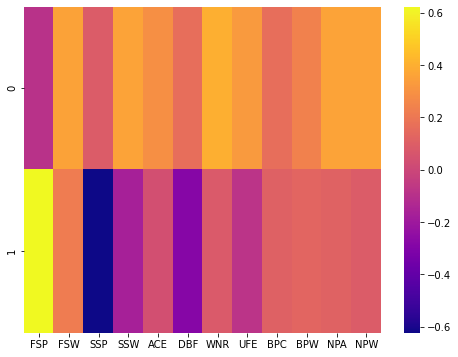

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_comp,cmap='plasma')

# cu cat contribuie fiecare coloana la componenta respectiva, de revazut videoclipul StatQuest

Meaning the first PC (PC0) is composed by significant portions of the features: WNR, UFE, SSW and NPA, NPw

On the other end, a high value of the second PC indicates a high FSP and a low SSP, and vice versa.

## Finding the number of clusters

As it's the case, regardless the domain, having real life experiece goes a long way in making a machine learning project. It is common knowlede that there are 4 main types of tennis players.

Let's see if we can draw a similar conclusion from our dataset: 

We'll make us of both dendrograms as well as The Elbow Method( judged by Within_Cluster_Sum_Of_Square

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

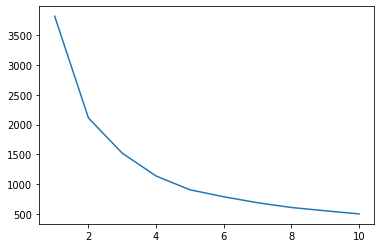

In [ ]:
plt.plot(range(1,11),wcss)

Aaaand Yes!
Looking for the k value, represented on the horizontal axis, we see taht for a k equal to 4, there isn't a significand drop in wcss anymore.

For a second opinion, however, let's check the result of the associated dendrogram:

In [ ]:
import scipy.cluster.hierarchy as sch

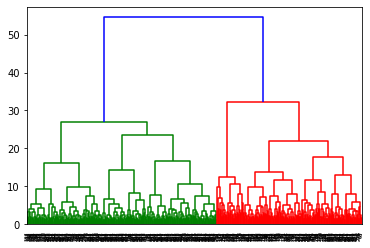

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(dataset.iloc[:,0:12],method='ward'))

# chosen method to minimize the variance inside the cluster

Looking for the largest vetical distance without overlapping any of the horizontal lines, it would mean that only 2 clusters is the way to

We cannot agree with this, but it is an interestring observation.

## KMeans Algorithm from scratch

The steps we are going to go through are as follows:

1. Decide the number K of clusters

2. Select at random K points, the centroids ( not necesarily from your dataset )

3. Assign each data point to the closest centroid ( thus forming K clusters ) 

4. Arange the data points so that each belongs to the closest centroid's cluster

5. Compute the new centroids and repeat #4 and #5 until no reassignment is made

Calculating euclidean distance between n-dimensional points:

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

The algorithm below is the concept of the Youtuber Patrick Loeber "Python Engineer":https://www.youtube.com/channel/UCbXgNpp0jedKWcQiULLbDTA

Let's give a more in depth explanation on how it works:

In [ ]:
np.random.seed(101)

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # np.random.choice() returns random samples from a given 1-D array, the number pf 
        # these random samples is reffered to as the second argument
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)

        #now we make a list which contains the samples that represent the centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            # Assign samples to closest centroids 
            self.clusters = self._create_clusters(self.centroids)
            
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

        
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

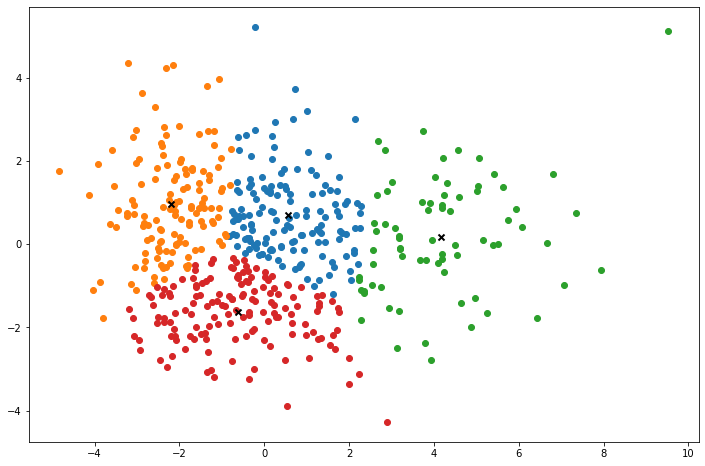

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
# X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
# print(X.shape)
    
# clusters = len(np.unique(y))
# print(clusters)
k = KMeans(K=4, max_iters=150, plot_steps=True)
y_pred = k.predict(x_pca)

k.plot()

## Conlusions

Let's remember what each principal component was "made out of" so we can interpret the graphic

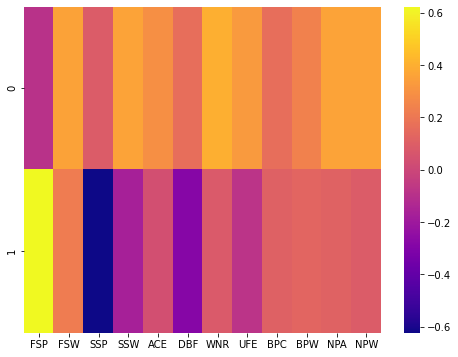

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_comp,cmap='plasma')


The cluster on the right, marked by the green color, represents the Behind the baseline defender, indicating players with WNR++ and UFE++ as well as average NPA

The Well-rounded players are represented by the cluster on the bottom side, as they WNR ammount is extremely reduced 

The blue cluster illustrates the serve-and-volley schemers, as they are associated with NPA++ FSW++ 

Finally, the Counter-punchers are marked in red, the ones at the bottom of the graph, being recognized by the low ammount of UFE, 
but equally few attepts to end the point at the net NPA--

### End word

By determinig which cluster an opponent is situated in, we, alongside our coach, can come up with a strategy to best them. 
Such strategies might include training in particular for returning the serve of, and later lobbing or passing a serve-and-volley schemer as well as many more

Thank you for your time!

To your next level,
        Mihalceanu Cristian